In [1]:
%%html 
<style>h1, h2, h3, h4, h5 {font-weight: normal !important}</style>

https://assessment.hackerearth.com/challenges/hiring/amazon-ml-engineer-hiring-challenge-may21-round-1/problems/8f7fbc2f754c4222ae917f7b05d3de4c/

In [2]:
# imports

import warnings
from pathlib import Path
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pd.options.display.max_columns = 30

## Data load

In [44]:
data_path = Path('C:/Users/tharu/datasets/amazon_hacker_earth/')
train_df = pd.read_csv(data_path/'Train.csv')
test_df = pd.read_csv(data_path/'Test.csv')
sample_submission = pd.read_csv(data_path/'sample submission.csv')

sample_submission.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,MaritalStatus,25.14
1,23568,DegreeBranch,91.44
2,21490,MartialStatus,76.92
3,8363,HighestDegree,77.92
4,6165,Gender,85.64


In [45]:
train_df.shape, test_df.shape

((13645, 22), (8745, 20))

In [46]:
# drop non important columns EmpID, EmpName
train_df.drop(['EmpID', 'EmpName'], axis=1, inplace=True)
test_df.drop(['EmpID', 'EmpName'], axis=1, inplace=True)

In [47]:
target = train_df.FitmentPercent
bias_factor = train_df.BiasInfluentialFactor

In [48]:
# train_df.drop(['FitmentPercent', 'BiasInfluentialFactor'], axis=1, inplace=True)
# train_df.shape, test_df.shape

## EDA

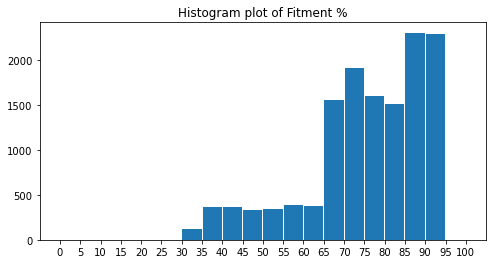

In [49]:
plt.figure(figsize=(8, 4))
plt.hist(target, bins=range(0, 100, 5), range=(0, 110), rwidth=0.95)
plt.xticks(range(0, 105, 5))
plt.title('Histogram plot of Fitment %')
plt.xlim(-5, 105);

### Null value check

In [50]:
train_df.isnull().sum().sum()

3336

In [51]:
test_df.isnull().sum().sum()

0

In [52]:
# null values in bias_influential_factor
bias_factor.isnull().sum()

3336

### Analyze relationship between Job type & Bias influential factor

In [62]:
bias_factors = bias_factor[bias_factor.notnull()].unique()
bias_factors

array(['YearsOfExperince', 'Gender', 'DegreeBranch', 'CurrentCompanyType',
       'MartialStatus', 'HighestDegree', 'EmpScore', 'Ethinicity',
       'LatestDegreeCGPA'], dtype=object)

In [64]:
job_types = train_df[bias_factor.notnull()].JobProfileIDApplyingFor.unique()
job_types

array(['JR85289', 'JR87525', 'JR70175', 'JR88879', 'JR88873', 'JR89890',
       'JR81165', 'JR79193', 'JR88654'], dtype=object)

In [98]:
bias_value_percents

[15.705128205128204,
 24.67948717948718,
 31.08974358974359,
 9.615384615384615,
 2.5641025641025643,
 5.448717948717949,
 4.8076923076923075,
 3.8461538461538463,
 2.2435897435897436]

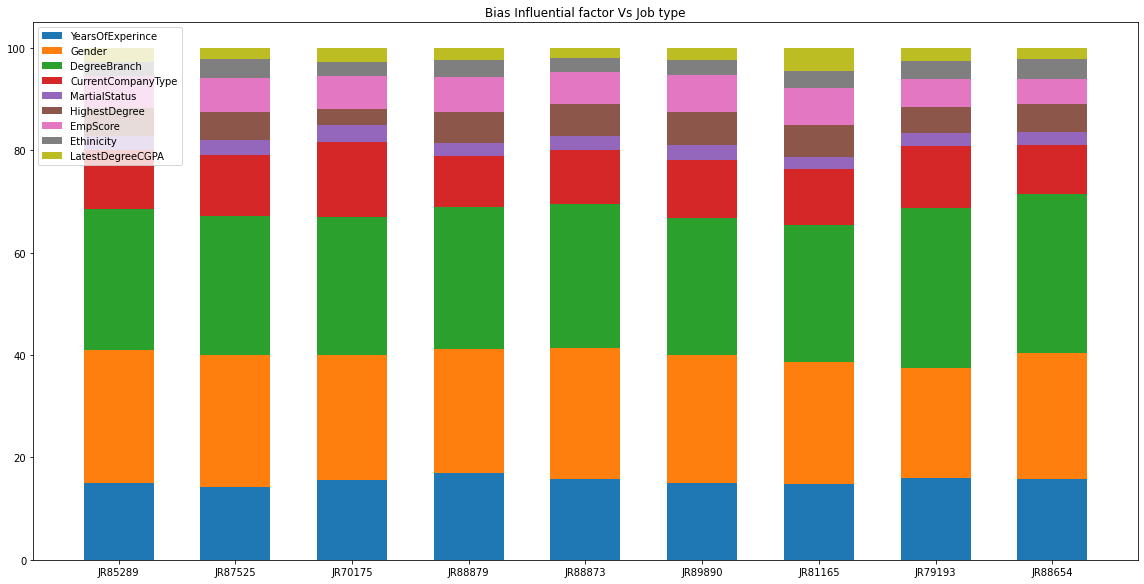

In [114]:
plt.figure(figsize=(16, 8))

not_null_train_df = train_df[bias_factor.notnull()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for ix, job_type in enumerate(job_types):
    job_filtered = not_null_train_df[not_null_train_df.JobProfileIDApplyingFor==job_type]
    bias_value_counts = job_filtered.BiasInfluentialFactor.value_counts()
    bias_value_percents = [(bias_value_counts[bias_factor]*100)/len(job_filtered) for bias_factor in bias_factors]
    bottom = 0
    for bias_percent, color in zip(bias_value_percents, colors):
        plt.bar(job_type, bias_percent, bottom=bottom, color=color, width=0.6)
        bottom += bias_percent
plt.legend(bias_factors, loc='upper left')
plt.tight_layout()
plt.title("Bias Influential factor Vs Job type")
plt.show()

In [53]:
train_df.columns

Index(['LanguageOfCommunication', 'Age', 'Gender', 'JobProfileIDApplyingFor',
       'HighestDegree', 'DegreeBranch', 'GraduatingInstitute',
       'LatestDegreeCGPA', 'YearsOfExperince', 'GraduationYear', 'CurrentCTC',
       'ExpectedCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation',
       'CurrentCompanyType', 'DepartmentInCompany', 'TotalLeavesTaken',
       'BiasInfluentialFactor', 'FitmentPercent'],
      dtype='object')

In [54]:
train_df[bias_factor.isnull()]

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
10,Hindi,29,Male,JR85289,B.Tech,Artificial Intelligence,Tier 1,7,6,2015,9,16,Married,3,EM,Enterprise,Finance,6,NaN,56.85
13,Hindi,27,Male,JR85289,B.Tech,Computer Science,Tier 1,5,4,2017,17,26,Married,2,EM,Enterprise,Engineering,20,NaN,41.99
17,English,34,Male,JR81165,M.Tech,Electrical,Tier 2,7,8,2013,12,18,Married,5,SSE,Enterprise,Design,16,NaN,38.68
22,Native,34,Male,JR87525,B.Tech,Electronics,Tier 1,7,11,2010,9,15,Married,3,SSE,Enterprise,Finance,18,NaN,34.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13630,Hindi,40,Male,JR87525,PhD,Electronics,Tier 2,8,10,2011,29,34,Single,3,EM,MidSized,Engineering,7,NaN,73.45
13631,English,33,Male,JR85289,PhD,Artificial Intelligence,Tier 2,8,3,2018,7,16,Single,3,EM,MidSized,Engineering,19,NaN,84.25
13633,English,32,Other,JR88873,B.Tech,Information Technology,Tier 1,5,9,2012,16,20,Married,3,DS,MidSized,Design,10,NaN,33.95
13635,English,35,Male,JR85289,PhD,Artificial Intelligence,Tier 2,5,5,2016,11,19,Married,5,SDE,MidSized,Product,10,NaN,69.49


In [55]:
len(train_df)-bias_factor.isnull().sum()

10309

In [56]:
bias_factor.value_counts()*100/(len(train_df) - bias_factor.isnull().sum())

DegreeBranch          27.723349
Gender                25.269182
YearsOfExperince      15.142109
CurrentCompanyType    11.388107
EmpScore               6.392473
HighestDegree          5.645552
Ethinicity             3.181686
MartialStatus          2.716073
LatestDegreeCGPA       2.541469
Name: BiasInfluentialFactor, dtype: float64

In [59]:
train_df[train_df.JobProfileIDApplyingFor=='JR85289'].loc[:, ['JobProfileIDApplyingFor', 'BiasInfluentialFactor']].value_counts()

JobProfileIDApplyingFor  BiasInfluentialFactor
JR85289                  DegreeBranch             983
                         Gender                   926
                         YearsOfExperince         535
                         CurrentCompanyType       410
                         EmpScore                 223
                         HighestDegree            192
                         Ethinicity                99
                         LatestDegreeCGPA          99
                         MartialStatus             95
dtype: int64

In [42]:
train_df[bias_factor.notnull()].JobProfileIDApplyingFor.value_counts()*100/(len(train_df) - bias_factor.isnull().sum())

JR85289    34.552333
JR87525    24.793869
JR88879     8.982443
JR88873     8.381026
JR89890     8.361626
JR79193     5.063537
JR81165     5.044136
JR88654     3.026482
JR70175     1.794548
Name: JobProfileIDApplyingFor, dtype: float64

In [31]:
train_df.JobProfileIDApplyingFor.value_counts()*100/len(train_df)

JR85289    34.422866
JR87525    25.034811
JR88879     9.021620
JR89890     8.479296
JR88873     8.230121
JR81165     4.990839
JR79193     4.968853
JR88654     3.078051
JR70175     1.773543
Name: JobProfileIDApplyingFor, dtype: float64